In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)


2.10.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

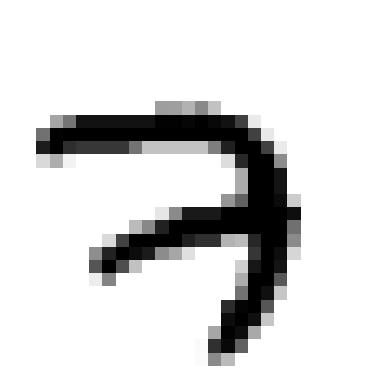

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

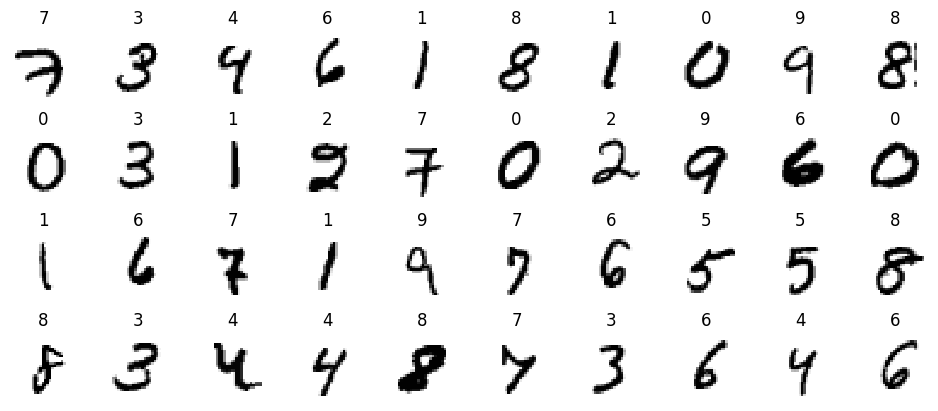

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
import keras.utils as np_utils


# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5936 - accuracy: 0.8470 - val_loss: 0.3069 - val_accuracy: 0.9178
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2916 - accuracy: 0.9171 - val_loss: 0.2444 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2391 - accuracy: 0.9311 - val_loss: 0.2016 - val_accuracy: 0.9428
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2038 - accuracy: 0.9414 - val_loss: 0.1797 - val_accuracy: 0.9496
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1779 - accuracy: 0.9487 - val_loss: 0.1592 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1577 - accuracy: 0.9547 - val_loss: 0.1474 - val_accuracy: 0.9584
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1412 - accuracy: 0.9600 - val_loss: 0.1356 - val_accuracy:

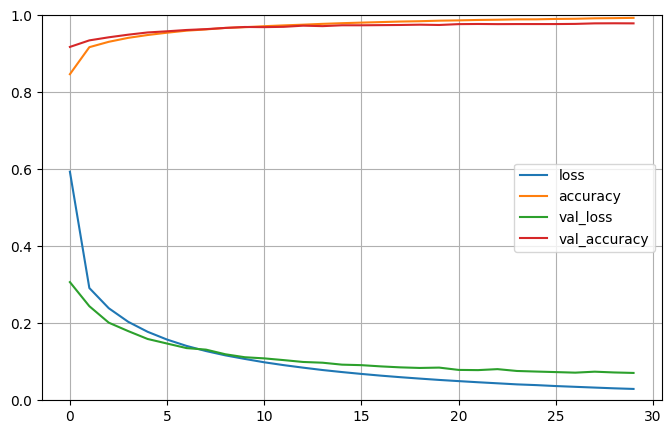

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0698 - accuracy: 0.9776


[0.06979889422655106, 0.9775999784469604]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 69ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

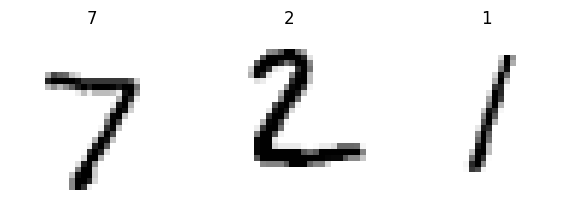

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

In [20]:

from keras.layers import Flatten
from keras.layers import Dense
from keras import Sequential

relu_model = Sequential()
relu_model.add(Flatten(input_shape=[28, 28]))
relu_model.add(Dense(300,activation="relu"))
relu_model.add(Dense(100,activation="relu"))
relu_model.add(Dense(10,activation="softmax"))
relu_model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
relu_model.summary()

relu_history = relu_model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32,epochs=20)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6045 - accuracy: 0.8415 - val_loss: 0.3062 - val_accuracy: 0.9200
Epoch 2/20
1719/1719 [==============

In [21]:
elu_model = Sequential()
elu_model.add(Flatten(input_shape=[28, 28]))
elu_model.add(Dense(300,activation="elu",input_shape=(X_train.shape[1],)))
elu_model.add(Dense(100,activation="elu"))
elu_model.add(Dense(10,activation="softmax"))
elu_model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
elu_model.summary()

elu_history = elu_model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=20)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               235500    
                                                                 
 dense_19 (Dense)            (None, 100)               30100     
                                                                 
 dense_20 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5299 - accuracy: 0.8564 - val_loss: 0.3194 - val_accuracy: 0.9104
Epoch 2/20
1719/1719 [==============

In [22]:
leakyrelu_model = Sequential()
leakyrelu_model.add(Flatten(input_shape=[28, 28]))
leakyrelu_model.add(Dense(300,activation="leaky_relu",input_shape=(X_train.shape[1],)))
leakyrelu_model.add(Dense(100,activation="leaky_relu"))
leakyrelu_model.add(Dense(10,activation="softmax"))
leakyrelu_model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
leakyrelu_model.summary()

leakyrelu_history = leakyrelu_model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=20)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5773 - accuracy: 0.8478 - val_loss: 0.3117 - val_accuracy: 0.9135
Epoch 2/20
1719/1719 [==============

# Zad. 
Stwórz wykres porównujący metody. 

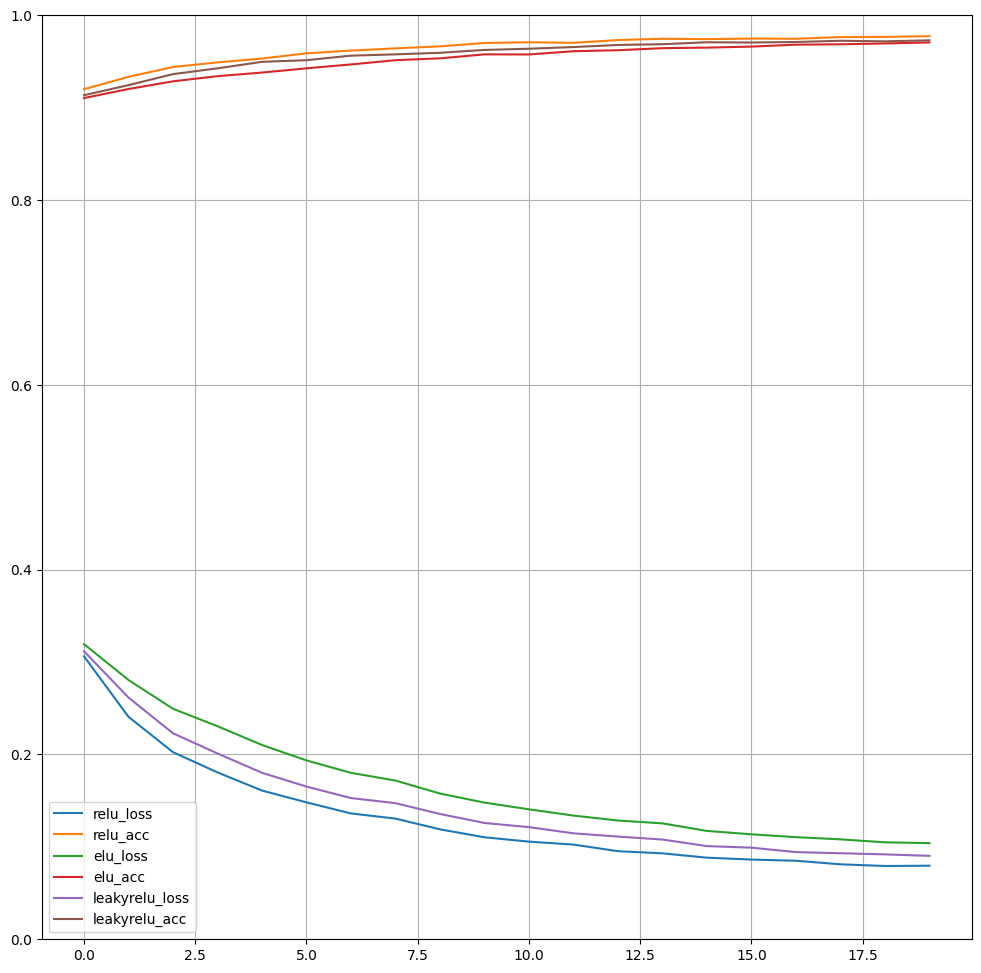

In [23]:
plt.figure(figsize=(12,12))

plt.plot(relu_history.history['val_loss'])
plt.plot(relu_history.history['val_accuracy'])
plt.plot(elu_history.history['val_loss'])
plt.plot(elu_history.history['val_accuracy'])
plt.plot(leakyrelu_history.history['val_loss'])
plt.plot(leakyrelu_history.history['val_accuracy'])
plt.legend([ 'relu_loss', 'relu_acc','elu_loss' ,'elu_acc','leakyrelu_loss', 'leakyrelu_acc'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()